In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Holt's winters Method

In [12]:
cola = pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx")
cola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [13]:
cola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [14]:
cola.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [15]:
cola[cola.duplicated()]

,Quarter,Sales


In [16]:
temp = cola.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')

<ipython-input-16-b45c4802f531>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  temp = cola.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')


In [17]:
cola['quater'] = pd.to_datetime(temp).dt.strftime('%b-%Y')
cola.head()

,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [18]:
# We will extract Quarter values and Year values separately from 'Quarter column'
cola['Quarters'] = 0
cola['Year'] = 0
for i in range(42):
    p = cola["Quarter"][i]
    cola['Quarters'][i]= p[0:2]
    cola['Year'][i]= p[3:5]
cola.head()

<ipython-input-18-3fecfef3857e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cola['Quarters'][i]= p[0:2]
<ipython-input-18-3fecfef3857e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cola['Year'][i]= p[3:5]


,Quarter,Sales,quater,Quarters,Year
0,Q1_86,1734.827000,Jan-1986,Q1,86
1,Q2_86,2244.960999,Apr-1986,Q2,86
2,Q3_86,2533.804993,Jul-1986,Q3,86
3,Q4_86,2154.962997,Oct-1986,Q4,86
4,Q1_87,1547.818996,Jan-1987,Q1,87


In [20]:
cola = cola.drop("quater", axis=1)
cola.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [21]:
# Getting dummy variables for Quarters Q1, Q2, Q3, Q4 
Quarters_Dummies = pd.DataFrame(pd.get_dummies(cola['Quarters']))
cola = pd.concat([cola,Quarters_Dummies],axis = 1)
cola.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


<Axes: xlabel='quater'>

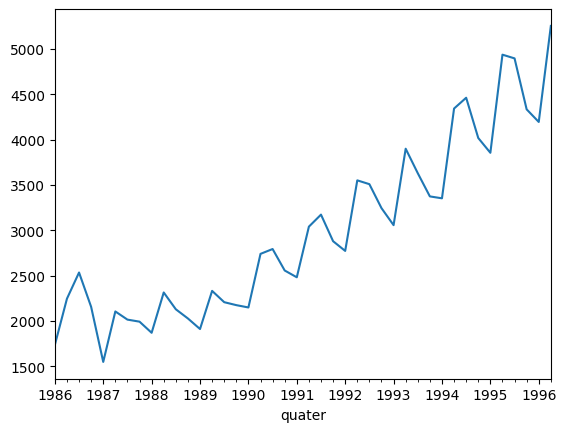

In [9]:
cola.Sales.plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


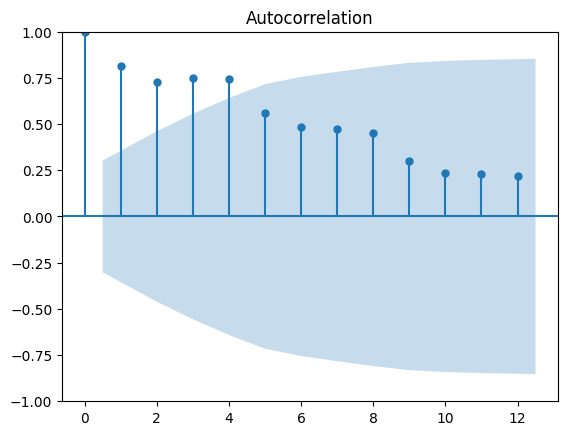

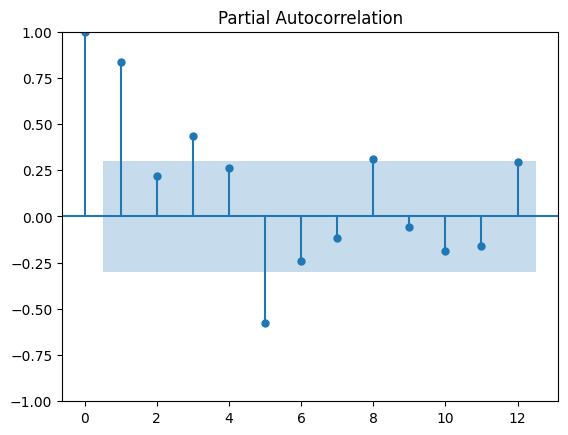

In [10]:
# plotting ACF and PACF graphs
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cola.Sales,lags=12)
tsa_plots.plot_pacf(cola.Sales,lags=12)
plt.show()

<Axes: xlabel='Quarters', ylabel='Sales'>

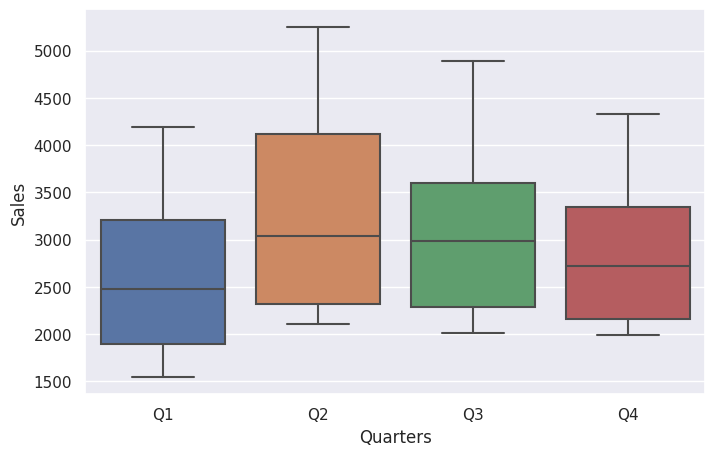

In [22]:
#boxplot of Quarters Vs. Sales
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x="Quarters",y="Sales",data=cola)

Minimum sales are recorded in Quarter Q1 and Maximum sales are recorded in Quarter Q2

<Axes: xlabel='Year', ylabel='Sales'>

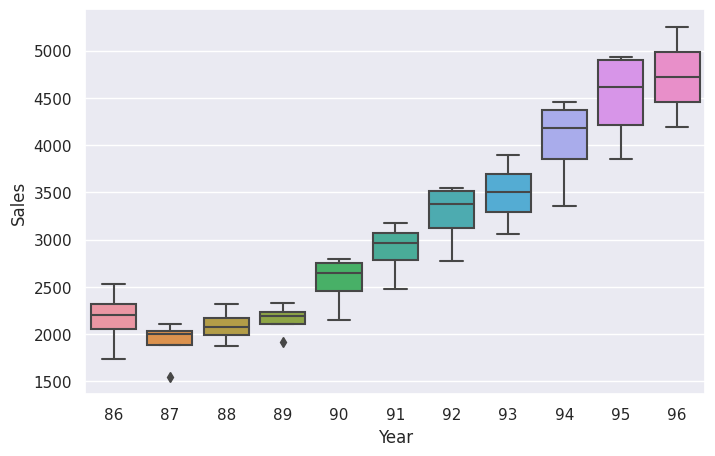

In [23]:
# boxplot of Years Vs. Sales
sns.boxplot(x="Year",y="Sales",data=cola)

we can sales are increasing linearly from 1987


#Data Driven Forecasting Methods

In [25]:
# Splitting data into Train and Test (77/33)
Train = cola.head(32)
Test = cola.tail(10)

#Moving Average Method

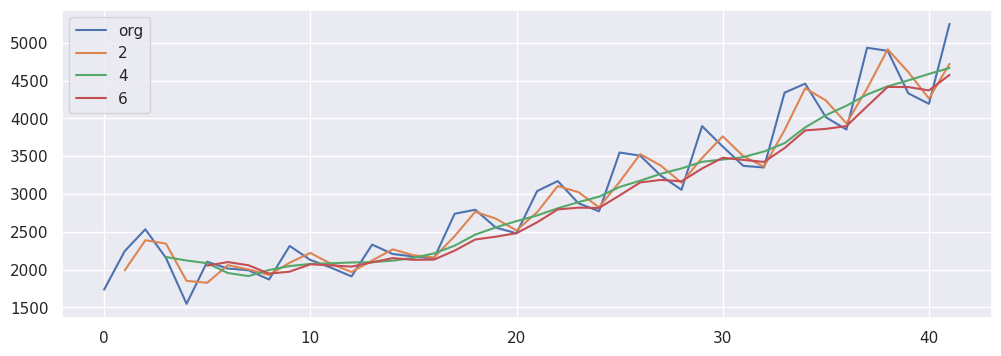

In [26]:
plt.figure(figsize=(12,4)) 
cola.Sales.plot(label="org") 
for i in range(2,8,2): 
    cola["Sales"].rolling(i).mean().plot(label=str(i))
    plt.legend(loc='best')


#Time series decomposition plot

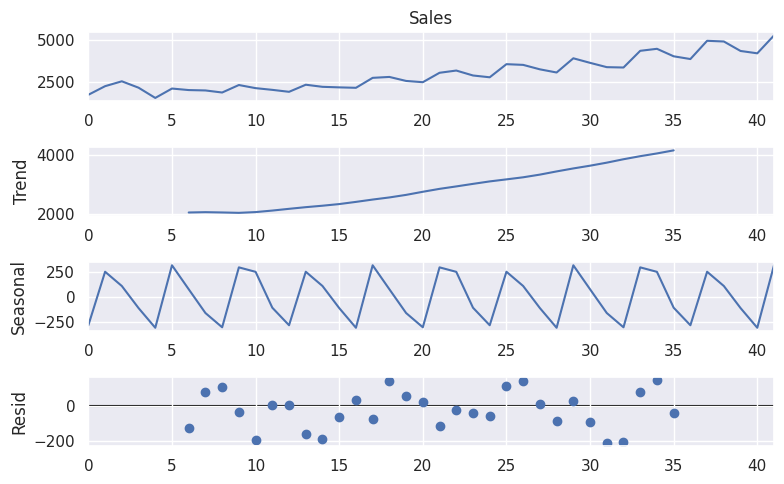

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(cola.Sales,period=12)
decompose_ts_add.plot()
plt.show()

#Evaluation Metric RMSE

In [28]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

#Simple Exponential Method

In [29]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = RMSE(Test.Sales, pred_ses)
rmse_ses_model

1034.9359056453961

#Holt method

In [30]:
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model = RMSE(Test.Sales, pred_hw)
rmse_hw_model

941.6367810616845

#Holts winter exponential smoothing with additive seasonality and additive trend

In [31]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add_model = RMSE(Test.Sales, pred_hwe_add_add)
rmse_hwe_add_add_model

633.4394050169811

#Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [32]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_add_model = RMSE(Test.Sales, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

568.1679856842486

#Model based Forecasting Methods


In [33]:
# Data preprocessing for models
cola["t"] = np.arange(1,43)
cola["t_squared"] = cola["t"]*cola["t"]

cola["log_sales"] = np.log(cola["Sales"])

cola.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [35]:
#splitting data into train and test
Train = cola.head(32)
Test = cola.tail(10)

#Linear Model

In [36]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Sales'], pred_linear)
rmse_linear_model

752.9233932767116

#Exponential Model

In [37]:
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model = RMSE(Test['Sales'], np.exp(pred_Exp))
rmse_Exp_model

590.3316432076487

#Quadratic Model

In [38]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model = RMSE(Test['Sales'], pred_Quad)
rmse_Quad_model

457.735735540752

#Additive Seasonality model

In [39]:
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1', 'Q2', 'Q3']]))
rmse_add_sea = RMSE(Test['Sales'], pred_add_sea)
rmse_add_sea

1850.466546185836

#Additive Seasonality Quadratic model

In [40]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_Quad_model = RMSE(Test['Sales'], pred_add_sea_quad)
rmse_add_sea_Quad_model

277.3510771128639

#Multiplicative Seasonality model

In [41]:
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data=Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mul_sea = RMSE(Test['Sales'], np.exp(pred_Mult_sea))
rmse_Mul_sea

1908.2503948361164

#Multiplicative Additive Seasonality model

In [42]:
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mul_Add_sea = RMSE(Test['Sales'], np.exp(pred_Mult_add_sea))
rmse_Mul_Add_sea

448.86781826918514

In [43]:
list = [['Simple Exponential Method',rmse_ses_model], ['Holt method',rmse_hw_model],
          ['HW exp smoothing add',rmse_hwe_add_add_model],['HW exp smoothing mult',rmse_hwe_model_mul_add_model],
          ['Linear Mode',rmse_linear_model],['Exp model',rmse_Exp_model],['Quad model',rmse_Quad_model],
          ['add seasonality',rmse_add_sea],['Quad add seasonality',rmse_add_sea_Quad_model],
          ['Mult Seasonality',rmse_Mul_sea],['Mult add seasonality',rmse_Mul_Add_sea]]

In [44]:
rmse_data = pd.DataFrame(list, columns =['Model', 'RMSE_Value'])
rmse_data.sort_values('RMSE_Value')

,Model,RMSE_Value
8,Quad add seasonality,277.351077
10,Mult add seasonality,448.867818
6,Quad model,457.735736
3,HW exp smoothing mult,568.167986
5,Exp model,590.331643
2,HW exp smoothing add,633.439405
4,Linear Mode,752.923393
1,Holt method,941.636781
0,Simple Exponential Method,1034.935906
7,add seasonality,1850.466546


Created 4 dummies and Additive Seasonality Quadratic model RMSE value(277.35) is least compare to other models.